In [1]:
import os
import sys
sys.path.append(os.path.join(os.path.abspath("."), '../src'))
import pyvista as pv
import numpy as np
pv.set_jupyter_backend("static")

In [2]:
from SimpleFVM import *
mesh_filename: str = "../example/mesh.cgns"
mesh = MyMesh()
mesh.readCGNS(mesh_filename, 0, 2)
mesh.mesh

ERROR:root:Input port 0 of algorithm vtkAppendFilter (0000020EE0D2BB70) has 0 connections but is not optional.


UnstructuredGrid (0x20ef306a800)
  N Cells:    133
  N Points:   153
  X Bounds:   -1.400e-02, 1.600e-02
  Y Bounds:   -1.400e-02, 1.000e-02
  Z Bounds:   0.000e+00, 0.000e+00
  N Arrays:   5

{21: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1}


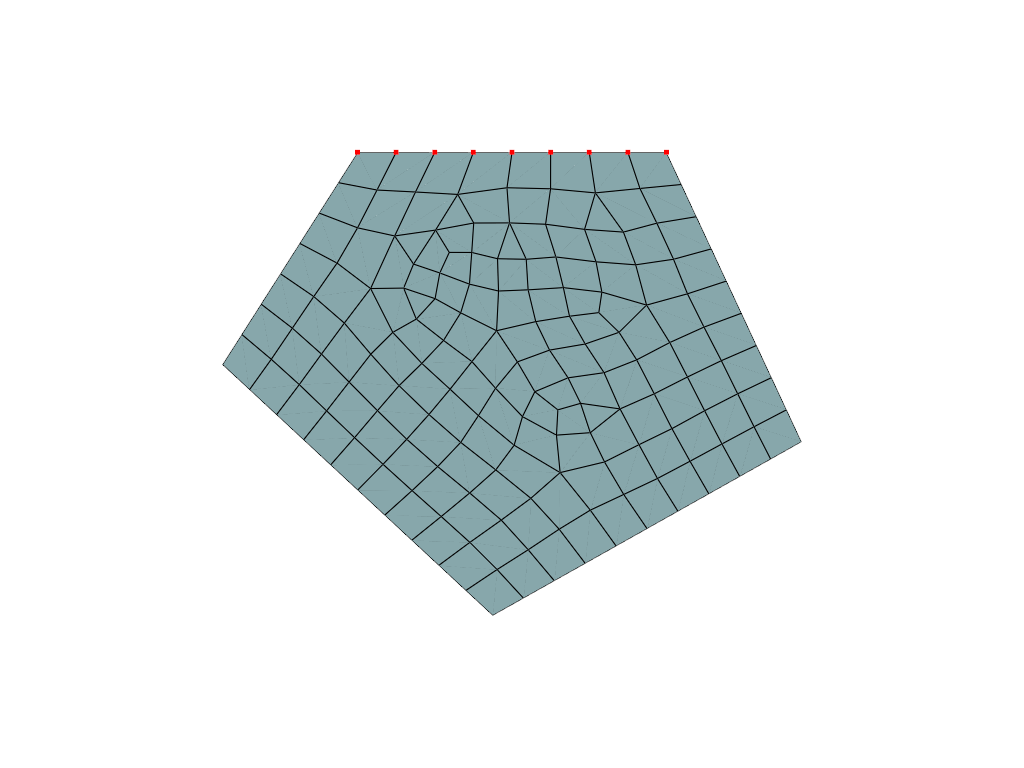

In [3]:
def isDirichletPoint(x, y) -> bool:
    if y > 0.99e-2:
        return True
    else:
        return False
    pass

def dirichletValue(x, y) -> float:
    return 1
    pass

mesh.setDirichletBoundary(isDirichletPoint, dirichletValue)
print(mesh.dirichlet_boundary_dict)
markDirichletBoundary(mesh)

In [4]:
solver: Solver = Solver()
solver.combineMesh(mesh)
solver.setAlpha(0.0001)
solver.setMaxIteration(100)
solver.setDt(1e-2)

In [5]:
solver.solve("../example/dirichlet_demo")

100%|██████████| 100/100 [00:08<00:00, 12.32it/s]


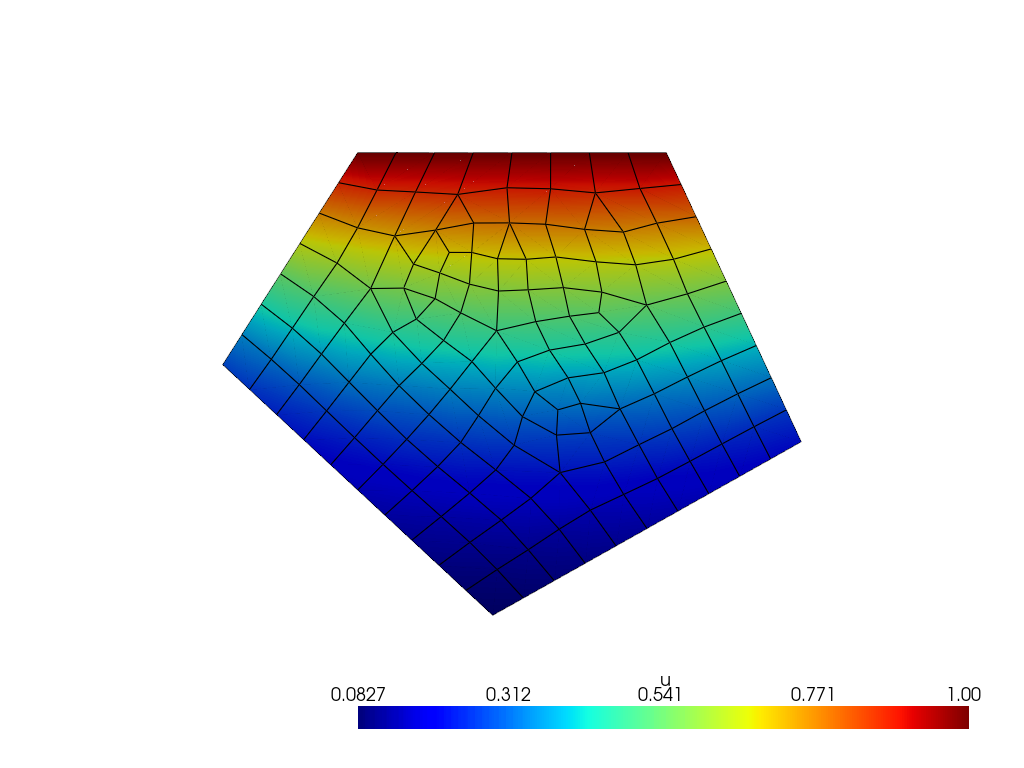

In [6]:
plotCurrentStateOnPoints(solver)